### Below Code contains all necessary imports

In [1]:
import pandas as pd
import numpy as np
from math import isnan
from k_means_constrained import KMeansConstrained

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Region,Distributor Code,Retailer Code,Pincode,Salesman Name,Latitude,Longitude,Visits/week
0,TN CHN,22520,225201600002,600004,KANNIYAPPAN K,12.753042,80.002606,1
1,TN CHN,22520,225201600015,603204,KANNIYAPPAN K,12.691710,79.974238,2
2,TN CHN,22520,225201600023,603204,KANNIYAPPAN K,12.763205,80.003638,3
3,TN CHN,22520,225201600029,603204,KANNIYAPPAN K,12.759006,80.006993,1
4,TN CHN,22520,225201600078,600004,PRITHIVIRAJAN D,12.744115,79.990242,2


### General Analysis

In [3]:
data.shape

(54761, 8)

In [4]:
d = {}
c = 0
for i in range(54600):
    bg = data.iloc[i,5]
    if data.iloc[i,5] == 0 or data.iloc[i,6] == 0:
        c += 1
print(c)

0


# Clustering by not considering missing values

In [5]:
data_no_miss = data.dropna(how='any')

In [6]:
data_no_miss = data_no_miss.drop_duplicates()

In [7]:
data_no_miss.shape

(53199, 8)

In [8]:
lat_long_nm = data_no_miss[['Latitude','Longitude']]

In [9]:
lat_long_arr = np.array(lat_long_nm)

In [10]:
clf = KMeansConstrained(
     n_clusters=35,
     size_min=1515,
     size_max=1525,
     random_state=0,
     n_jobs=-1
)
clf.fit_predict(lat_long_arr)
print(clf.cluster_centers_)
print(clf.labels_)

[[13.09352831 80.26021968]
 [10.98925864 78.16150296]
 [11.44736363 77.61484915]
 [ 8.89425412 78.05726881]
 [11.61550074 79.65795997]
 [12.30794018 78.37159107]
 [12.6199683  77.96588949]
 [12.84291916 80.09023652]
 [11.71775433 78.08690543]
 [11.20632437 76.8602687 ]
 [10.88275351 79.2323408 ]
 [ 9.97708914 78.1239069 ]
 [13.00367801 80.22657081]
 [ 8.34844162 77.46380458]
 [13.06256354 80.17103679]
 [10.89423215 78.71833384]
 [10.03574505 77.49055038]
 [10.31146974 78.924607  ]
 [12.87399603 78.97554142]
 [10.75892094 79.6304294 ]
 [13.14415856 79.95379607]
 [ 8.91890448 77.57457621]
 [11.53824016 78.32459756]
 [11.32222599 77.80275154]
 [10.71527394 77.1647367 ]
 [ 9.64814471 78.77568535]
 [12.04346239 79.68933606]
 [12.73520062 79.58899469]
 [11.97949211 79.07661697]
 [12.95722803 80.17687722]
 [11.09619007 77.33310046]
 [11.00856261 76.97998826]
 [13.15728933 80.23852335]
 [ 9.57467976 77.86375493]
 [10.36013842 77.96515471]]
[ 7  7  7 ... 13 13 13]


In [11]:
len(clf.labels_)

53199

In [12]:
ab,ba = np.unique(clf.labels_,return_counts=True)
print(dict(zip(ab,ba)))

{0: 1525, 1: 1522, 2: 1515, 3: 1515, 4: 1515, 5: 1515, 6: 1515, 7: 1525, 8: 1525, 9: 1525, 10: 1525, 11: 1525, 12: 1525, 13: 1515, 14: 1525, 15: 1525, 16: 1515, 17: 1515, 18: 1522, 19: 1525, 20: 1515, 21: 1515, 22: 1515, 23: 1515, 24: 1515, 25: 1515, 26: 1515, 27: 1525, 28: 1515, 29: 1525, 30: 1525, 31: 1525, 32: 1525, 33: 1515, 34: 1525}


In [36]:
gh = []
for i in range(len(clf.labels_)):
    if clf.labels_[i] == 1:
        gh.append(list(lat_long_arr[i]))

In [37]:
print(gh)

[[10.9517043, 78.4402913], [10.9867257, 78.3373162], [10.9510582, 78.4419821], [10.9895693, 78.317938], [10.9623481, 78.4490523], [10.994775, 78.219515], [10.9734076, 78.3847838], [10.9600813, 78.4469907], [10.9858254, 78.3381538], [10.9738634, 78.3837788], [10.9607749, 78.4394528], [10.9515677, 78.4415866], [10.963048, 78.4497838], [10.996175, 78.2186278], [10.9872187, 78.3364991], [11.0260844, 78.3859807], [10.9517416, 78.4401448], [10.9935493, 78.2168093], [10.9548022, 78.4409762], [10.9585731, 78.4460207], [10.9542493, 78.4410192], [11.0287877, 78.386449], [10.9611781, 78.4400329], [10.9493131, 78.4439283], [10.9625449, 78.446283], [10.9602531, 78.4398521], [10.9537161, 78.4411893], [10.9934968, 78.2168486], [10.9833256, 78.3390094], [10.9620306, 78.4398193], [11.0274599, 78.386577], [10.956805, 78.44291], [10.9878591, 78.3344808], [10.9616438, 78.4403561], [10.9604308, 78.4414055], [11.0260977, 78.3859359], [10.9900129, 78.3251296], [10.989364, 78.3179708], [10.9539937, 78.4437583

In [38]:
clf_1 = KMeansConstrained(
     n_clusters=38,
     size_min=35,
     size_max=45,
     random_state=0,
     n_jobs=-1
)
clf_1.fit_predict(gh)
print(clf_1.cluster_centers_)
print(clf_1.labels_)

[[10.96053034 78.0759209 ]
 [11.206357   78.16659026]
 [10.93927216 78.41838348]
 [10.94709456 78.08867   ]
 [10.72127276 77.89485346]
 [11.21442977 78.17918739]
 [10.99635911 78.08095829]
 [10.74083265 78.39165923]
 [10.60330181 78.41638981]
 [11.14770897 78.3296274 ]
 [10.99637682 78.08092988]
 [11.07779331 78.14154203]
 [10.96054144 78.07591892]
 [10.96723625 78.32798504]
 [11.02451548 78.05822643]
 [11.21375879 78.18242882]
 [10.96054368 78.07591834]
 [11.21095023 78.16700165]
 [10.99637852 78.0809388 ]
 [10.80427937 77.98151974]
 [10.64140705 78.27467646]
 [11.20629918 78.16657752]
 [10.96053778 78.07591614]
 [10.96051915 78.07575879]
 [10.9605334  78.0759146 ]
 [11.19739441 78.1663766 ]
 [10.958325   78.08392812]
 [10.95437997 78.44204528]
 [11.04615913 78.40877263]
 [10.96642734 78.05554736]
 [11.22595205 78.1655261 ]
 [10.94715605 78.0886845 ]
 [10.96324633 78.07677236]
 [10.98776693 78.07881185]
 [10.92480735 78.43868185]
 [10.97415372 78.24258659]
 [10.94159673 78.10130249]
 

In [39]:
xd = [[],[]]
for i in clf_1.cluster_centers_:
    xd[0].append(i[0])
    xd[1].append(i[1])

In [40]:
xr = []
for i in range(len(clf_1.labels_)):
    if clf_1.labels_[i] == 1:
        xr.append(list(gh[i]))

In [41]:
print(xr)

[[11.2063813, 78.1666309], [11.2063858, 78.1666216], [11.2060713, 78.1665796], [11.2064637, 78.1665789], [11.2062674, 78.1666273], [11.206353, 78.1665939], [11.2063275, 78.1666092], [11.2064215, 78.1665596], [11.2063947, 78.1665859], [11.2063525, 78.1665937], [11.2064545, 78.1665904], [11.2062454, 78.1666228], [11.2064285, 78.1665451], [11.2063469, 78.1665982], [11.2064655, 78.1665847], [11.2063671, 78.1666048], [11.2062367, 78.166608], [11.2062717, 78.166635], [11.2063519, 78.1665952], [11.2063791, 78.1665838], [11.2063193, 78.1666154], [11.2063123, 78.1666204], [11.2064165, 78.1666083], [11.2061882, 78.166757], [11.2063319, 78.1665946], [11.2063844, 78.1666472], [11.2063106, 78.1666421], [11.2064209, 78.1665592], [11.2063526, 78.1665939], [11.2061397, 78.166579], [11.2063207, 78.1666158], [11.2063064, 78.1666395], [11.206412, 78.1665649], [11.2063221, 78.1665995], [11.2063845, 78.1666202], [11.2063658, 78.1666024], [11.2063273, 78.1664169], [11.2063513, 78.1663935], [11.2063542, 78.1

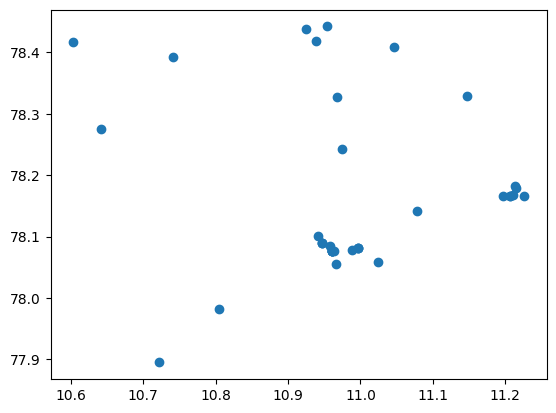

In [18]:
import matplotlib.pyplot as plt
plt.scatter(xd[0],xd[1])
plt.show()

C:\Users\hrith\AppData\Local\Temp\ipykernel_3336\1693667705.py:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Axes: >

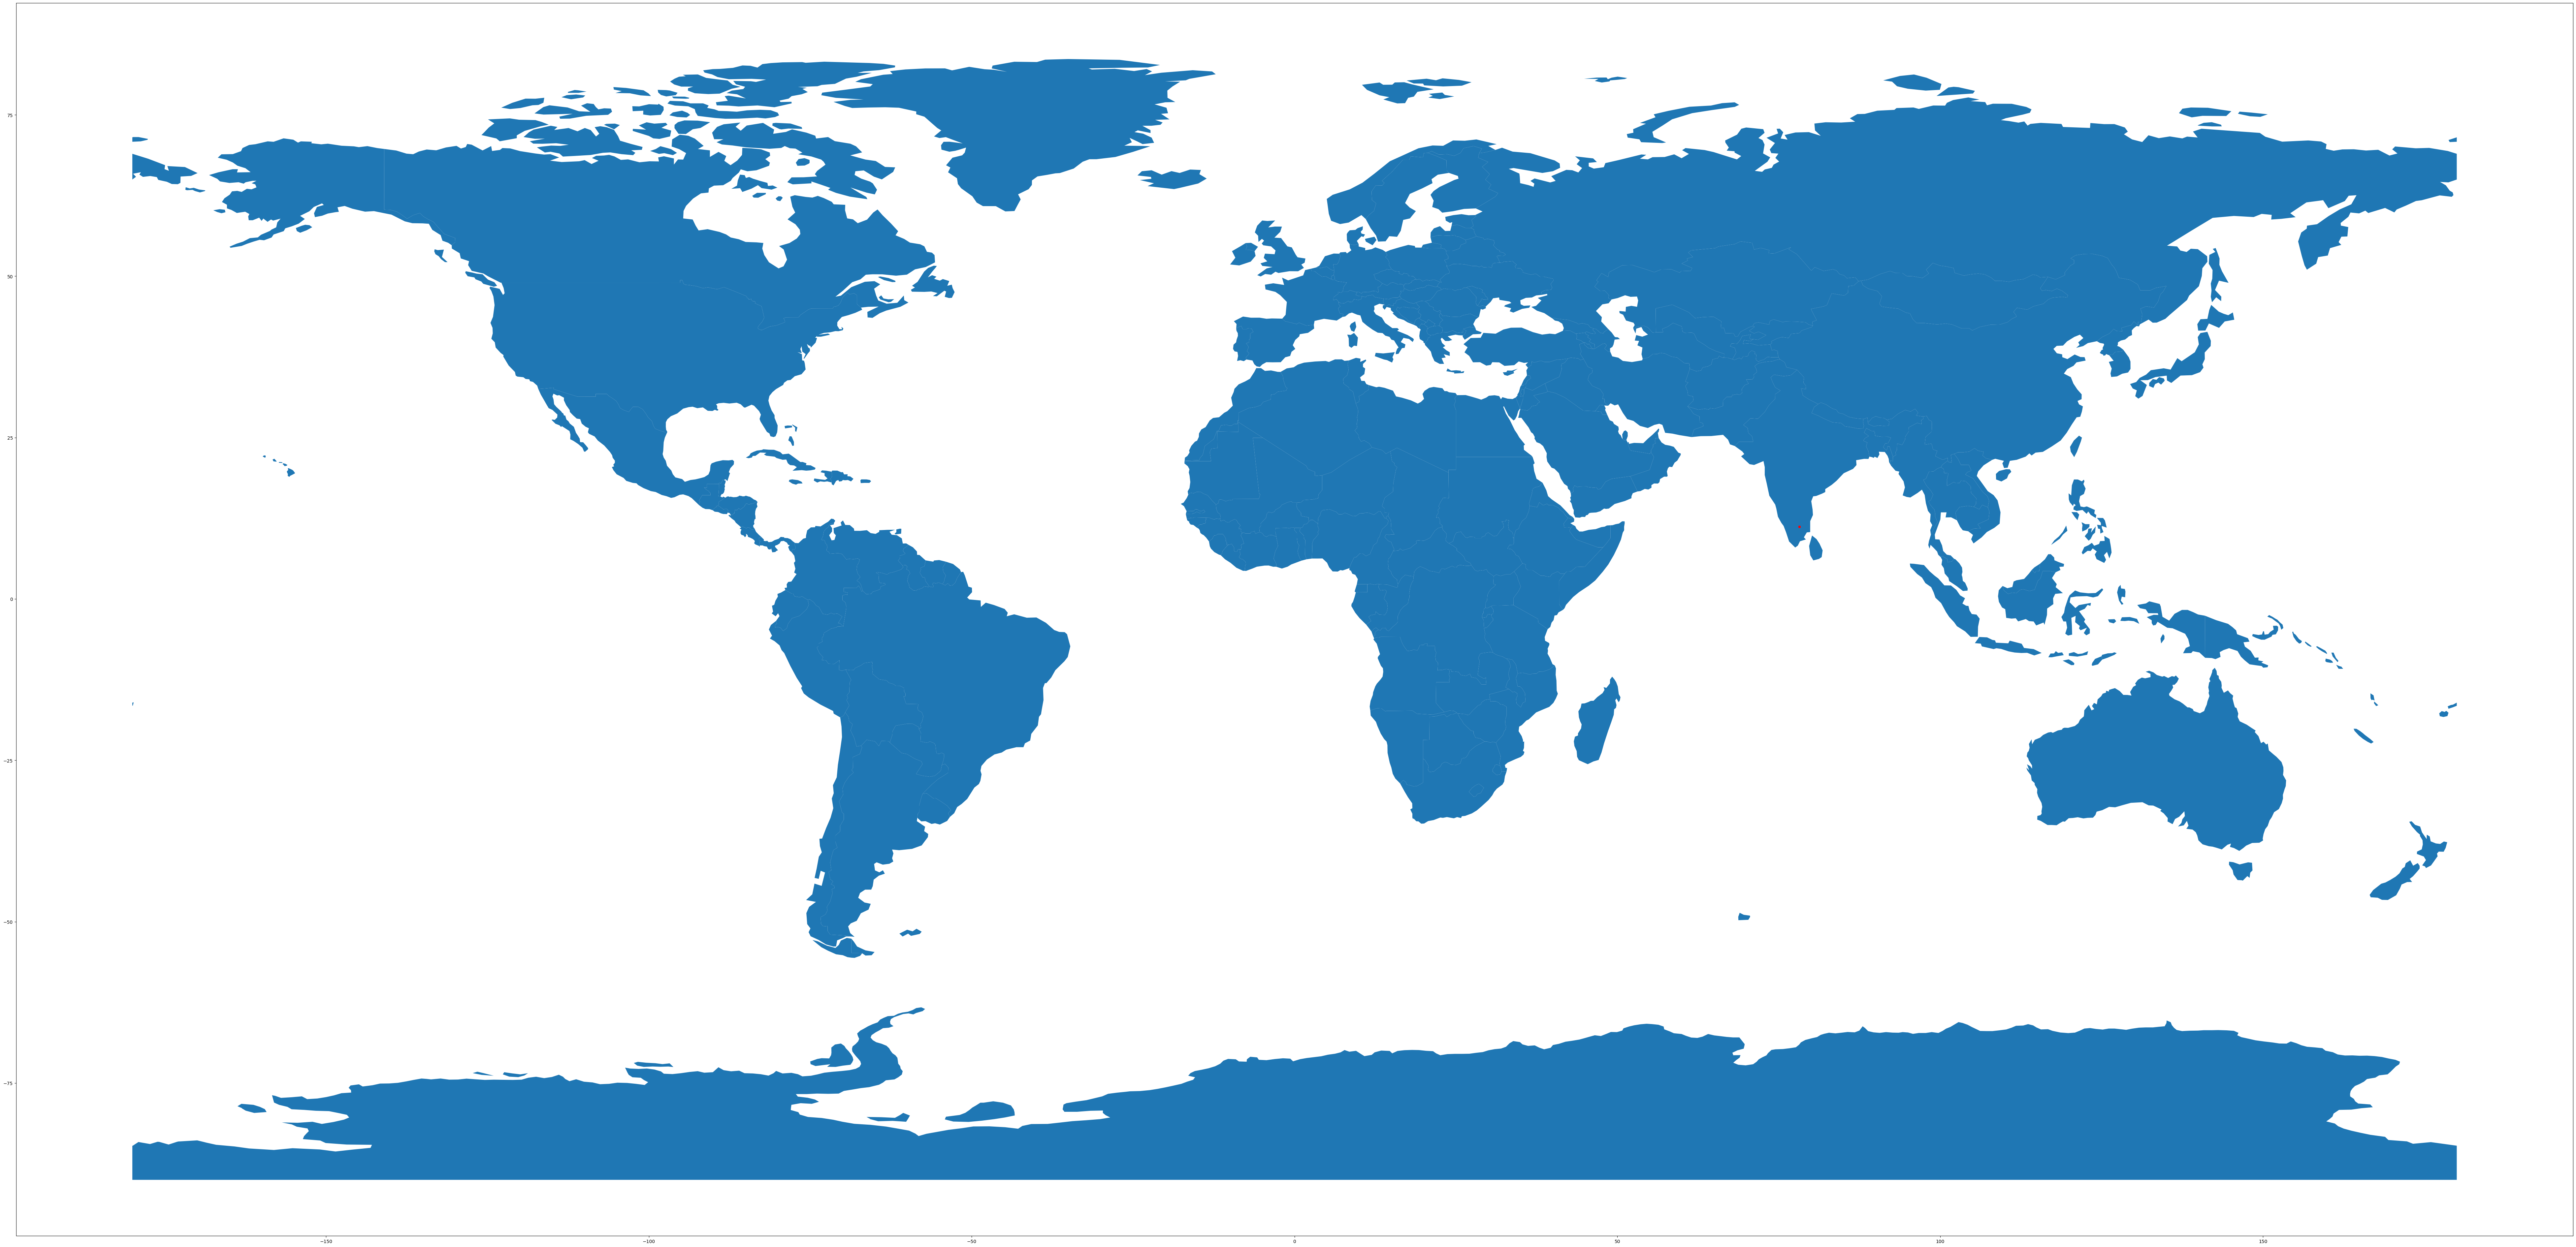

In [42]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df = pd.DataFrame(xr,columns=['Lat','Long'])
# df_1 = pd.DataFrame(clf_1.cluster_centers_,columns=['Lat','Long'])

geometry = [Point(xy) for xy in zip(df['Long'], df['Lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(100, 60)), marker='o', color='red', markersize=15)

In [44]:
import plotly.express as px
import pandas as pd

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="Lat", 
                        lon="Long", 
                        zoom=8,
                        # color="blue",
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig1.update_layout(mapbox_style="open-street-map")
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig1.show()

In [ ]:
clf_2 = KMeansConstrained(
     n_clusters=665,
     size_min=35,
     size_max=45,
     random_state=0,
     n_jobs=-1
)
clf_2.fit_predict(hi)
print(clf_2.cluster_centers_)
print(clf_2.labels_)

# Latitude and Longitude missing values replacement

In [73]:
data.isnull().sum()

Region                 0
Distributor Code       0
Retailer Code          0
Pincode                0
Salesman Name          0
Latitude            1408
Longitude           1408
Visits/week            0
dtype: int64

# Removing Duplicates

In [6]:
data_1 = data.drop_duplicates()